In [1]:
import numpy as np

import subprocess
import os


def parse_sdds_table(sddsfile, columns, sdds2plaindata_exe='sdds2plaindata'):
    """
    Get tabular data from SDDS file.
    
    Example:
        get_table('LCLS2scH.twi', ['s', 'betax', 'betay', 'etax'])
    """

    assert os.path.exists(sddsfile)

    outfile = sddsfile+'_table'
    cmd0 = [sdds2plaindata_exe, sddsfile, outfile, '-noRowCount', '-outputMode=ascii']

    cmd = cmd0 + [f'-col={c}' for c in columns] + ['-separator= ']

    output,error  = subprocess.Popen(
                    cmd, universal_newlines=True,
                    stdout=subprocess.PIPE, stderr=subprocess.PIPE).communicate()
    assert os.path.exists(outfile), f'{outfile} does not exist'

    rdat = np.loadtxt(outfile)

    dat = {}
    for i, key in  enumerate(columns):
        dat[key] = rdat[:,i]

    os.remove(outfile)
    return dat

In [3]:
dat = parse_sdds_table('elegant/one_quad.twi', ['s', 'betax', 'betay', 'etax'])

In [4]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

Text(0, 0.5, '$\\beta_{x,y}$ (m)')

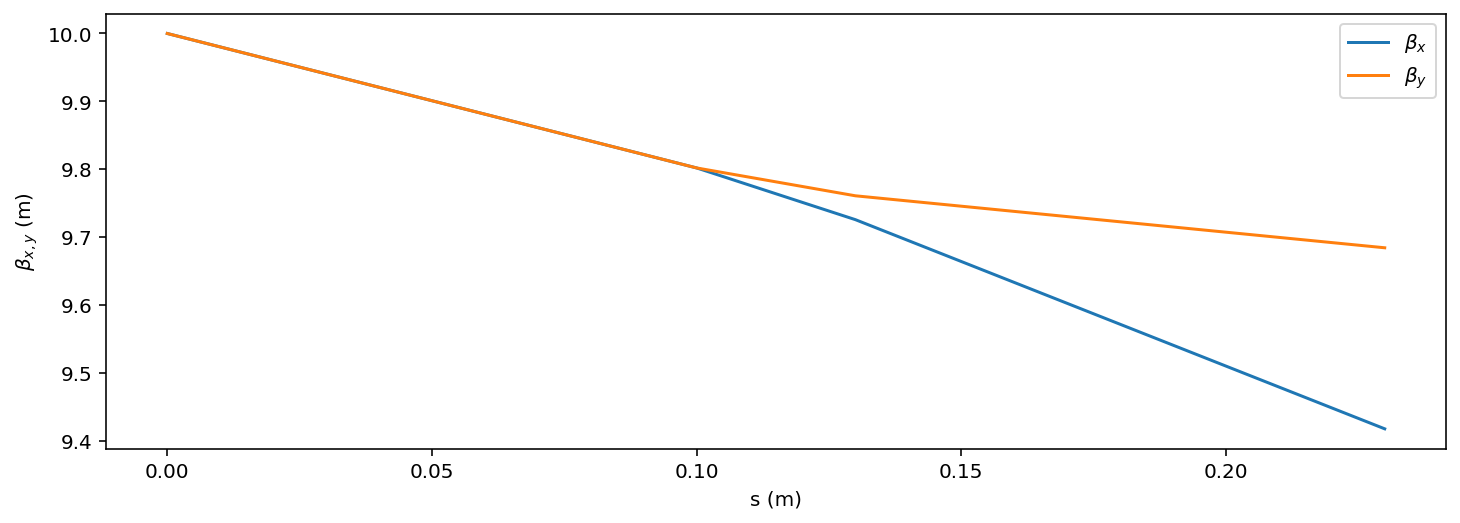

In [5]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(dat['s'], dat['betax'], label=r'$\beta_x$')
ax.plot(dat['s'], dat['betay'], label=r'$\beta_y$')
plt.legend()
ax.set_xlabel('s (m)')
ax.set_ylabel(r'$\beta_{x,y}$ (m)')